<a href="https://colab.research.google.com/github/bharathiv38/Bharathi/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter('ignore')

In [5]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

In [6]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [11]:
print(f'Number of row in train data: {df_train.shape[0]}')
print(f'Number of columns in train data: {df_train.shape[1]}')
print(f'Number of row in test data: {df_test.shape[0]}')
print(f'Number of columns in test data : {df_test.shape[1]}')

Number of row in train data: 8693
Number of columns in train data: 14
Number of row in test data: 4277
Number of columns in test data : 13


In [25]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [26]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


**EXPLORATORY DATA ANALYSIS**

Missing values column wise -
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


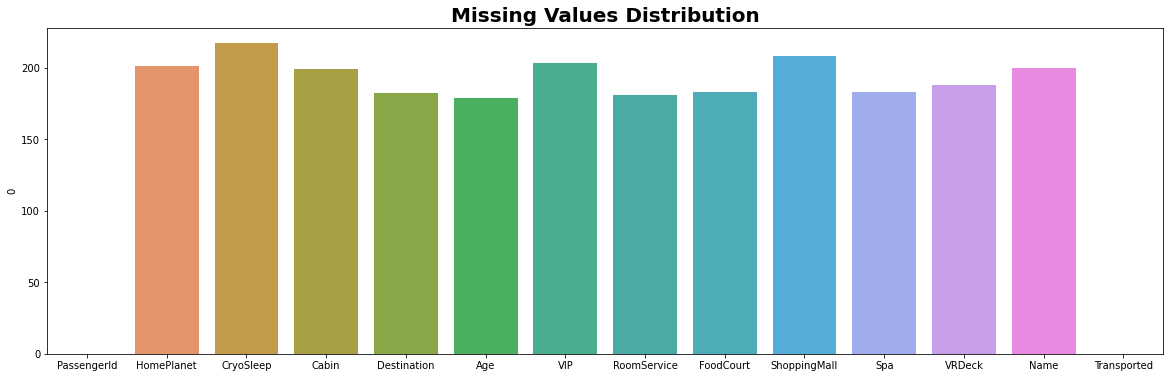

In [27]:
plt.figure(figsize=(20,6))

na = pd.DataFrame(df_train.isna().sum())

sns.barplot(y=na[0], x=na.index)
plt.title('Missing Values Distribution', size = 20, weight='bold')
print(colored("Missing values column wise -", 'magenta'))
print(colored(df_train.isna().sum(), 'magenta'))

plt.show()

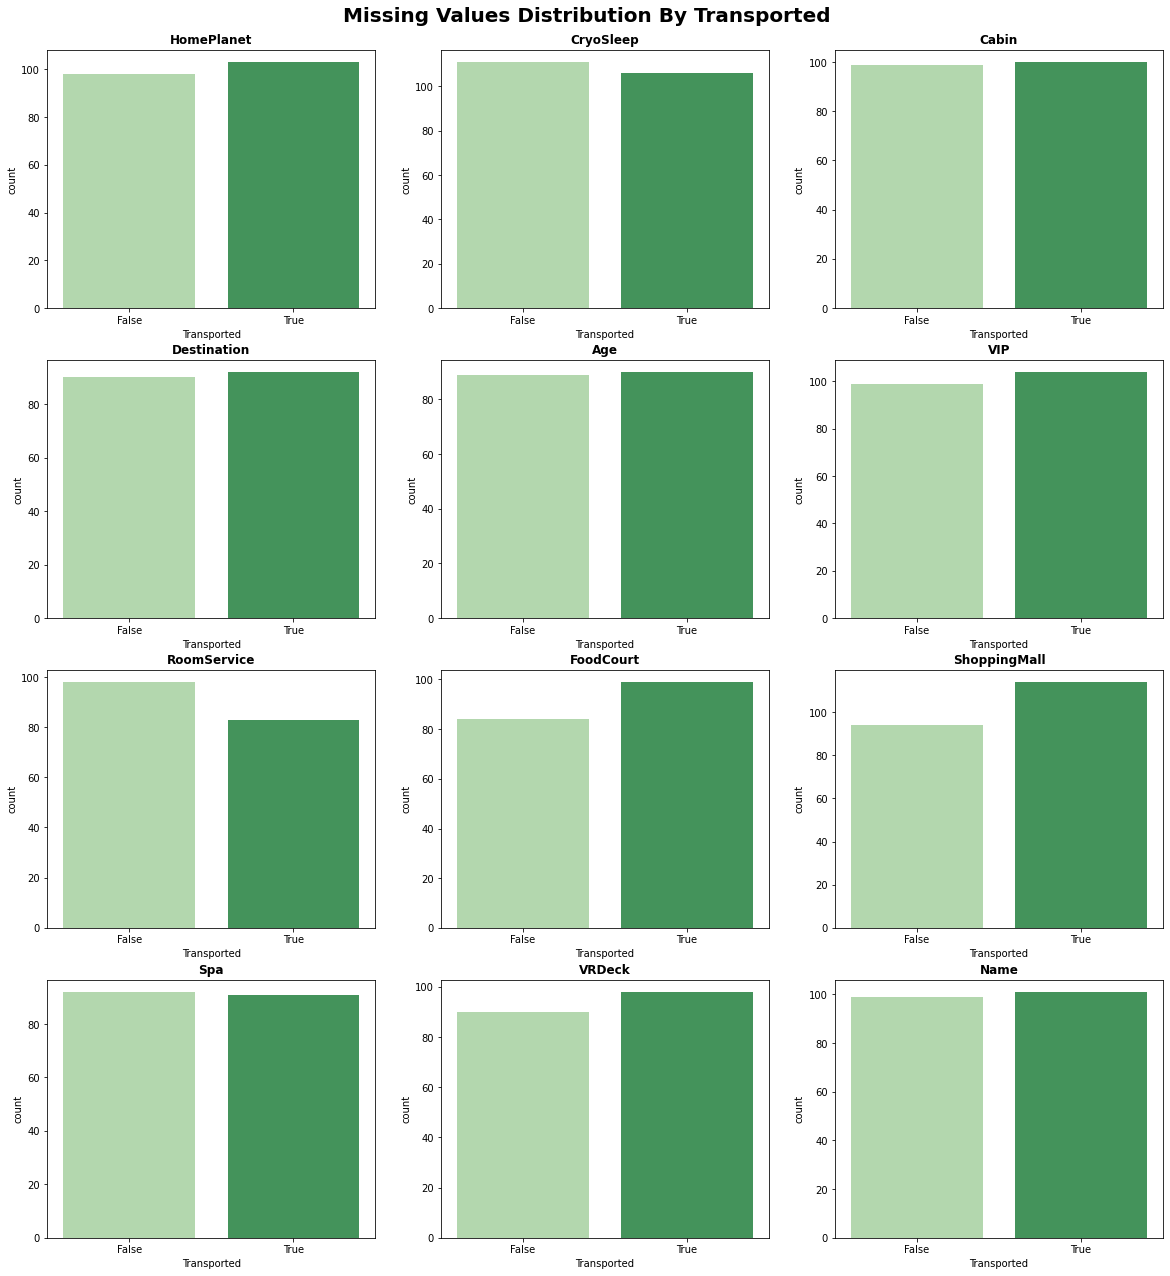

In [29]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle("Missing Values Distribution By Transported", size = 20, weight='bold')
fig.subplots_adjust(top=0.95)
i = 0
for x in df_train.columns:
    if len(df_train[df_train[x].isna()==True])>0:
        sns.countplot(x='Transported', data=df_train[df_train[x].isna()==True], ax=fig.axes[i], palette='Greens')
        fig.axes[i].set_title(x, weight='bold')
        i += 1
        
plt.show()

**INSIGHTS FROM THE GRAPH**

We can observe that all the columns have almost equal distribution of target
class.
So one thing we can say that even if we drop rows with missing values according to a particular column, it would not create any bias in the data(but we will not drop the rows right now).

Percentage of Passengers Transported - 50.36%
Percentage of Passengers Not Transported - 49.64%


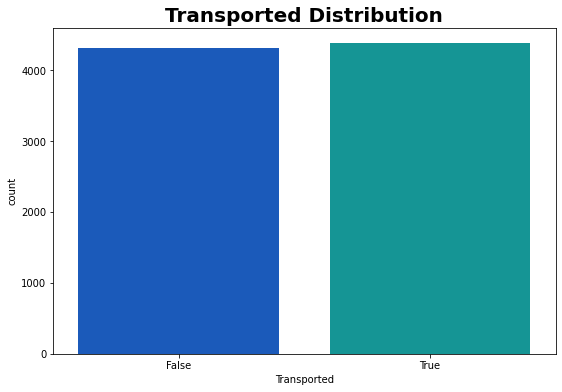

In [31]:
plt.figure(figsize=(9,6))

sns.countplot(x='Transported',data=df_train,palette='winter')
plt.title("Transported Distribution",size=20,weight='bold')

print(colored(f"Percentage of Passengers Transported - {(len(df_train[df_train['Transported']==True]) / df_train.shape[0])*100:.2f}%", 'cyan'))
print(colored(f"Percentage of Passengers Not Transported - {(len(df_train[df_train['Transported']==False]) / df_train.shape[0])*100:.2f}%", 'cyan'))
plt.show()

**INSIGHTS FROM THE GRAPH**

We can observe that the target column is almost perfectly balanced, so we don't have to worry about unequal distribution.

Number of unique groups - 6217
Group Size Distribution - 
   GroupSize  Count
0          1   4805
1          2    841
2          3    340
3          4    103
4          5     53
5          7     33
6          6     29
7          8     13


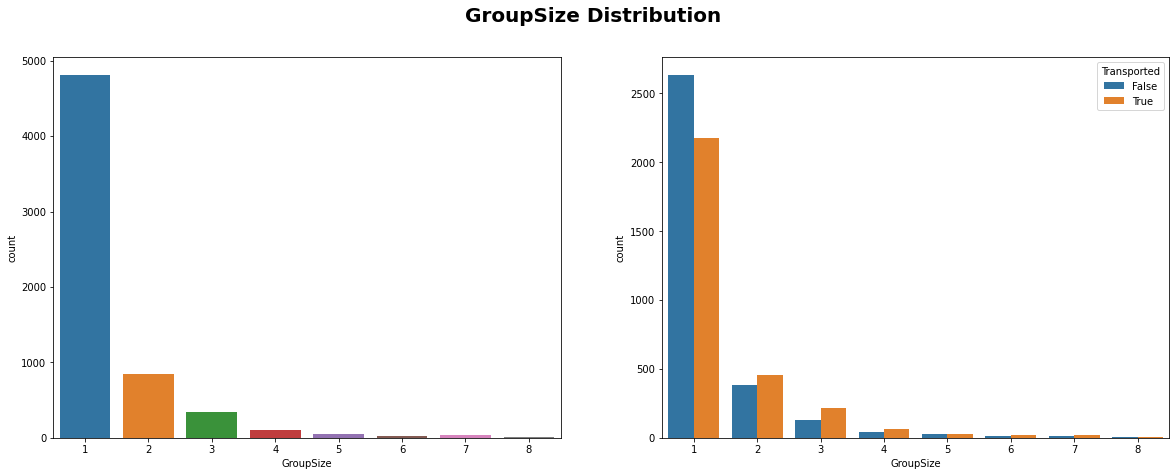

Total number of individual passengers - 4805
Number of individual passengers transported - 2174
Number of individual passengers not transported - 2631
Toal number of non individual passengers - 1412
Number of non individual passengers transported - 803
Number of non individual passengers not transported - 609


In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
fig.suptitle("GroupSize Distribution", size = 20, weight='bold')

df_train['Group'] = df_train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
df_train['GroupSize']=df_train['Group'].map(lambda x: df_train['Group'].value_counts()[x])

df_temp = df_train.drop_duplicates(subset = ["Group"], keep='last')

sns.countplot(x='GroupSize', data=df_temp, ax=ax[0])
sns.countplot(x='GroupSize', data=df_temp, hue='Transported', ax=ax[1])

print(colored(f"Number of unique groups - {len(df_temp)}",'blue'))
data = pd.DataFrame(df_temp['GroupSize'].value_counts()).reset_index().rename(columns={'index': 'GroupSize', 'GroupSize':'Count'})
print(colored("Group Size Distribution - ",'blue'))
print(colored(data, 'blue'))
plt.show()

print(colored(f"Total number of individual passengers - {len(df_temp[df_temp['GroupSize']==1])}", 'blue'))
print(colored(f"Number of individual passengers transported - {len(df_temp[(df_temp['GroupSize']==1) & (df_temp['Transported']==True)])}", 'blue'))
print(colored(f"Number of individual passengers not transported - {len(df_temp[(df_temp['GroupSize']==1) & (df_temp['Transported']==False)])}", 'blue'))
print(colored(f"Toal number of non individual passengers - {len(df_temp[df_temp['GroupSize']!=1])}", 'red'))
print(colored(f"Number of non individual passengers transported - {len(df_temp[(df_temp['GroupSize']!=1) & (df_temp['Transported']==True)])}", 'red'))
print(colored(f"Number of non individual passengers not transported - {len(df_temp[(df_temp['GroupSize']!=1) & (df_temp['Transported']==False)])}", 'red'))

**INSIGHTS FROM THE GRAPH**

We can observe that most of the passengers are individual passengers.
Apart from that the maximum size of the group is 8.
An interesting observation is that there is lesser chance of passenger to be transported if he/she is an individual than in a group.

HomePlanet Distribution - 
  HomePlanet  Count
0      Earth   4602
1     Europa   2131
2       Mars   1759


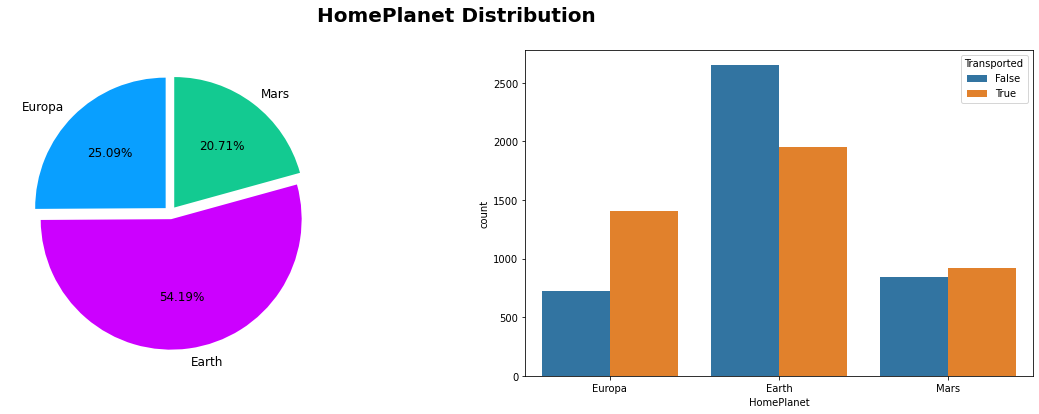

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('HomePlanet Distribution', size = 20, weight='bold')

sizes = list(df_train['HomePlanet'].value_counts(sort=False))

labels = df_train['HomePlanet'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
explode = (0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='HomePlanet', data=df_train, hue='Transported', ax=ax[1])

print(colored("HomePlanet Distribution - ",'green'))
data = pd.DataFrame(df_train['HomePlanet'].value_counts()).reset_index().rename(columns={'index': 'HomePlanet', 'HomePlanet':'Count'})
print(colored(data, 'green'))

plt.show()

**INSIGHTS FROM THE GRAPH**

We can observe that most of the passengers are from Earth.
There is a higher chance of residents from Europa to be transported than others.
The chances of the residents of Earth of getting transported is less.
There is equal probability for the residents of Mars.

CryoSleep Distribution - 
   CryoSleep  Count
0      False   5439
1       True   3037


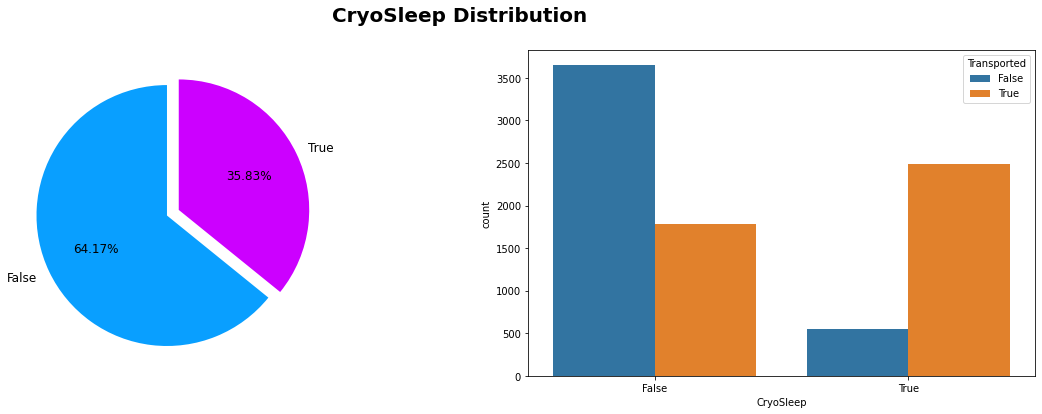

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('CryoSleep Distribution', size = 20, weight='bold')

sizes = list(df_train['CryoSleep'].value_counts())

labels = df_train['CryoSleep'].dropna().unique()
colors = ['#099FFF', '#CC00FF']
explode = (0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='CryoSleep', data=df_train, hue='Transported', ax=ax[1])

print(colored("CryoSleep Distribution - ",'magenta'))
data = pd.DataFrame(df_train['CryoSleep'].value_counts()).reset_index().rename(columns={'index': 'CryoSleep', 'CryoSleep':'Count'})
print(colored(data, 'magenta'))

plt.show()

**INSIGHTS FROM THE GRAPH**


We can observe that CyroSleep has a high false percentage.
One of the best thing is that this feature has a direct relationship with the Transported.
If CyroSleep is False, then the chances of Transported is less (Transported=False) whereas if CyroSleep is True, then the chances of Transported is high (Transported=True).

Cabin Deck Distribution - 
  Deck  Count
0    F   2794
1    G   2559
2    E    876
3    B    779
4    C    747
5    D    478
6    A    256
7    Z    199
8    T      5
Cabin Side Distribution - 
  Side  Count
0    S   4288
1    P   4206
2    Z    199


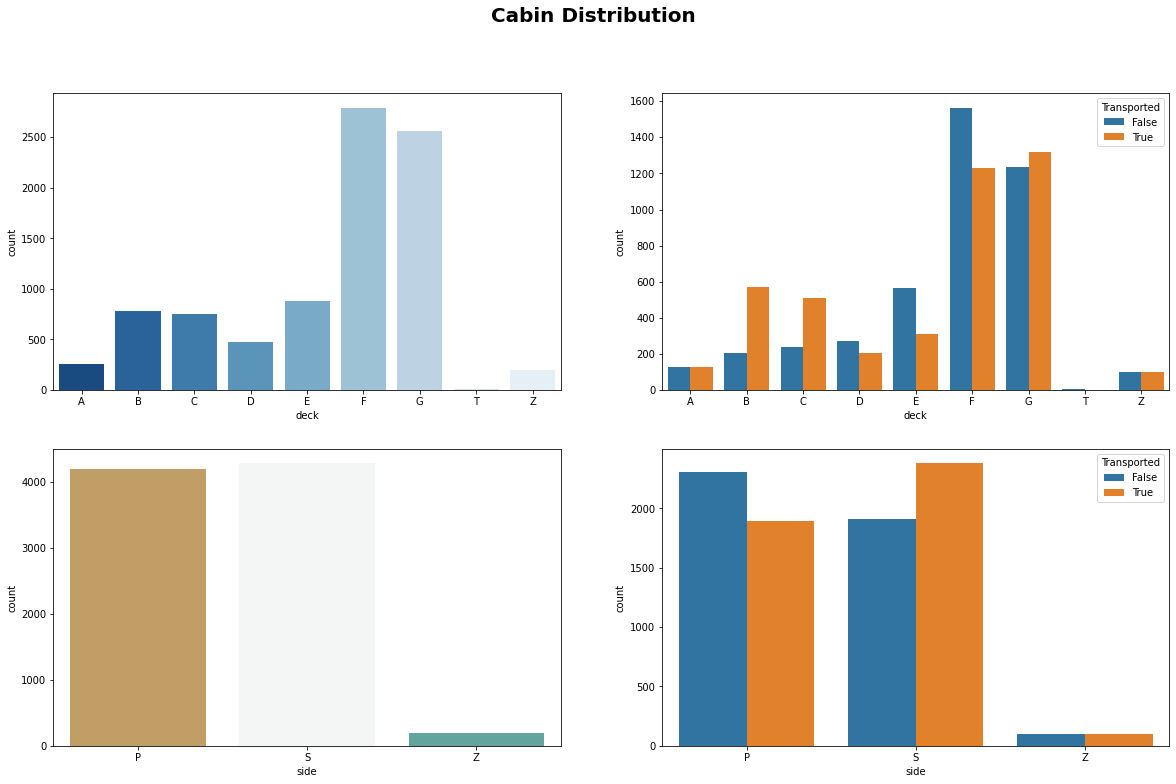

In [37]:
df_train['Cabin'].fillna('Z/9999/Z', inplace=True)
df_train['deck'] = df_train['Cabin'].apply(lambda x : x.split('/')[0])
df_train['side'] = df_train['Cabin'].apply(lambda x : x.split('/')[2])

fig, ax = plt.subplots(2, 2, figsize=(20,12))
fig.suptitle('Cabin Distribution', size = 20, weight='bold')

sns.countplot(x='deck', data=df_train, order=['A','B','C','D','E','F','G','T','Z'], ax=ax[0][0], palette='Blues_r')
sns.countplot(x='deck', data=df_train, order=['A','B','C','D','E','F','G','T','Z'], hue='Transported', ax=ax[0][1])

sns.countplot(x='side', data=df_train, ax=ax[1][0], palette='BrBG')
sns.countplot(x='side', data=df_train, hue='Transported', ax=ax[1][1])

print(colored("Cabin Deck Distribution - ",'red'))
data = pd.DataFrame(df_train['deck'].value_counts()).reset_index().rename(columns={'index': 'Deck', 'deck':'Count'})
print(colored(data, 'red'))

print(colored("Cabin Side Distribution - ",'blue'))
data = pd.DataFrame(df_train['side'].value_counts()).reset_index().rename(columns={'index': 'Side', 'side':'Count'})
print(colored(data, 'blue'))

plt.show()

**INSIGHTS FROM THE GRAPH**


The distribution of deck is very unequal whereas there is an almost equal distribution of side.
Also, there are only 5 samples of deck 'T'.
Apart from that, there is no proper conclusion on how the deck affects Transported as few classes have almost equal distribution whereas some has huge difference.
But if you look at the Cabin's Side, you’ll notice that passenger with side 'S' has higher chance of getting transported than side 'P'.

Destination Distribution - 
     Destination  Count
0    TRAPPIST-1e   5915
1    55 Cancri e   1800
2  PSO J318.5-22    796


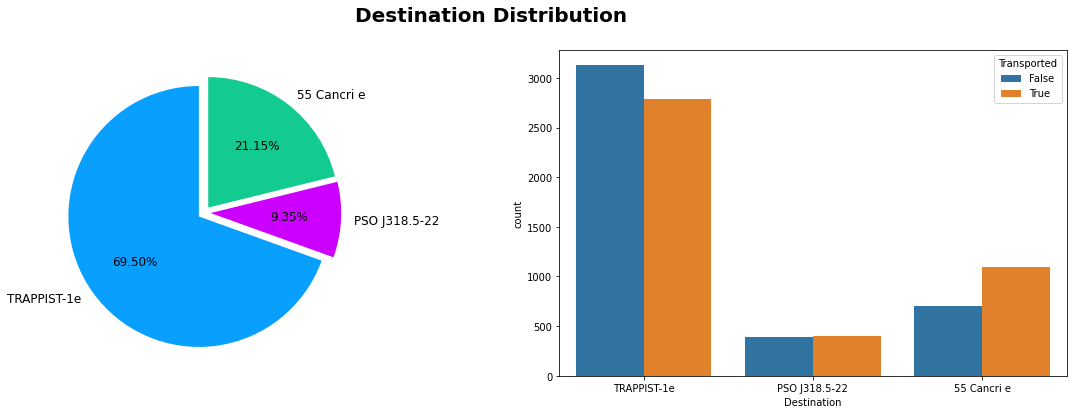

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Destination Distribution', size = 20, weight='bold')

sizes = list(df_train['Destination'].value_counts(sort=False))

labels = df_train['Destination'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
explode = (0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Destination', data=df_train, hue='Transported', ax=ax[1])

print(colored("Destination Distribution - ",'cyan'))
data = pd.DataFrame(df_train['Destination'].value_counts()).reset_index().rename(columns={'index': 'Destination', 'Destination':'Count'})
print(colored(data, 'cyan'))

plt.show()

**INSIGHTS FROM THE GRAPH**


We can observe that most of the passenger's destination is TRAPPIST-1e.
Apart from that, the chances of getting transported is maximum for the passengers having destination as 55 Cancri e, but the distribution is very much equal for the other two destinations.

VIP Distribution - 
     VIP  Count
0  False   8291
1   True    199


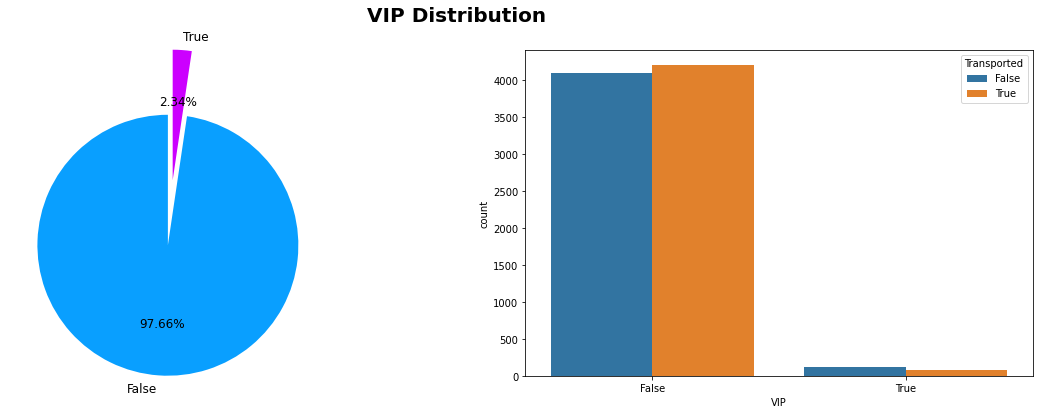

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('VIP Distribution', size = 20, weight='bold')

sizes = list(df_train['VIP'].value_counts(sort=False))

labels = df_train['VIP'].dropna().unique()
colors = ['#099FFF', '#CC00FF']
explode = (0.25,0.25) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='VIP', data=df_train, hue='Transported', ax=ax[1])

print(colored("VIP Distribution - ",'green'))
data = pd.DataFrame(df_train['VIP'].value_counts()).reset_index().rename(columns={'index': 'VIP', 'VIP':'Count'})
print(colored(data, 'green'))

plt.show()

**INSIGHTS FROM THE GRAPH**

We can observe that VIP has a high false percentage.
Also, this feature doesn't look useful as the transported distribution is almost equal for both VIP and non VIP passengers.

Transported Passengers Age Distribution - 
Minimum Age - 0.0
Maximum Age - 78.0
Average Age - 27.74883395522388
Non Transported Passengers Age Distribution - 
Minimum Age - 0.0
Maximum Age - 79.0
Average Age - 29.922858495030763


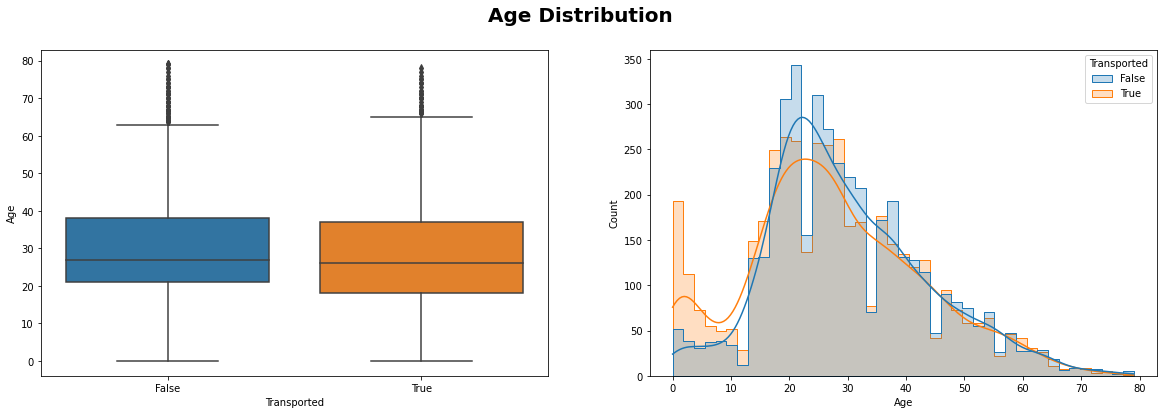

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Age Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='Age', data=df_train, ax=ax[0])
sns.histplot(x='Age', element="step", kde=True, data=df_train, hue='Transported', ax=ax[1])

print(colored("Transported Passengers Age Distribution - ", 'magenta'))
print(colored(f"Minimum Age - {df_train[df_train['Transported']==True]['Age'].describe()['min']}", 'magenta'))
print(colored(f"Maximum Age - {df_train[df_train['Transported']==True]['Age'].describe()['max']}", 'magenta'))
print(colored(f"Average Age - {df_train[df_train['Transported']==True]['Age'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers Age Distribution - ", 'blue'))
print(colored(f"Minimum Age - {df_train[df_train['Transported']==False]['Age'].describe()['min']}", 'blue'))
print(colored(f"Maximum Age - {df_train[df_train['Transported']==False]['Age'].describe()['max']}", 'blue'))
print(colored(f"Average Age - {df_train[df_train['Transported']==False]['Age'].describe()['mean']}", 'blue'))



plt.show()

**INSIGHTS FROM THE GRAPH**

From the first look we can observe that the distribution of age is almost similar for both transported and non transported passengers.
But if we look more carefully, we can oberve that initially the age distribution of transported passengers is high indicating that passengers having age less than 10 have higher chances of getting transported but it is quite opposite for the passengers who are in their 20s.
But rest the age distribution is quite similar for both classes.

Percentage of Passengers with no RoomService Billing - 64.16%
Transported Passengers RoomService Billing Distribution - 
Minimum RoomService Billing - 0.0
Maximum RoomService Billing - 3992.0
Average RoomService Billing - 63.09802095459837
Non Transported Passengers RoomService Billing Distribution - 
Minimum RoomService Billing - 0.0
Maximum RoomService Billing - 14327.0
Average RoomService Billing - 389.2660659236424


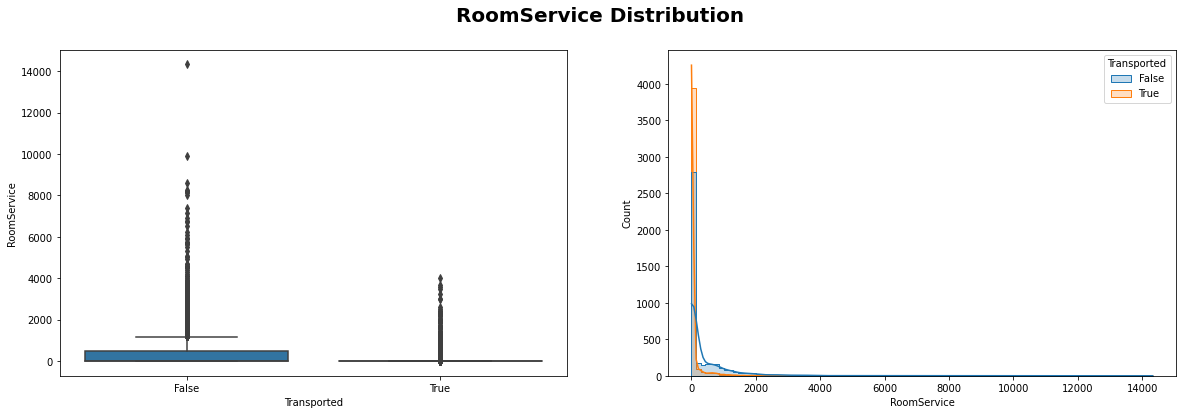

Percentage of Passengers with no FoodCourt Billing - 62.76%
Transported Passengers FoodCourt Billing Distribution - 
Minimum FoodCourt Billing - 0.0
Maximum FoodCourt Billing - 29813.0
Average FoodCourt Billing - 532.6919841084366
Non Transported Passengers FoodCourt Billing Distribution - 
Minimum FoodCourt Billing - 0.0
Maximum FoodCourt Billing - 16856.0
Average FoodCourt Billing - 382.61593004017965


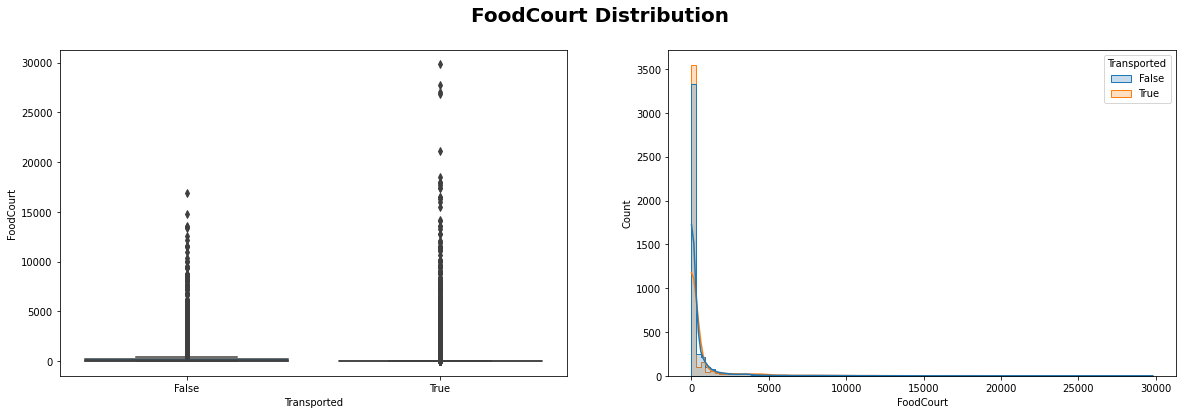

Percentage of Passengers with no ShoppingMall Billing - 64.27%
Transported Passengers ShoppingMall Billing Distribution - 
Minimum ShoppingMall Billing - 0.0
Maximum ShoppingMall Billing - 23492.0
Average ShoppingMall Billing - 179.82997185741087
Non Transported Passengers ShoppingMall Billing Distribution - 
Minimum ShoppingMall Billing - 0.0
Maximum ShoppingMall Billing - 10705.0
Average ShoppingMall Billing - 167.5662165363658


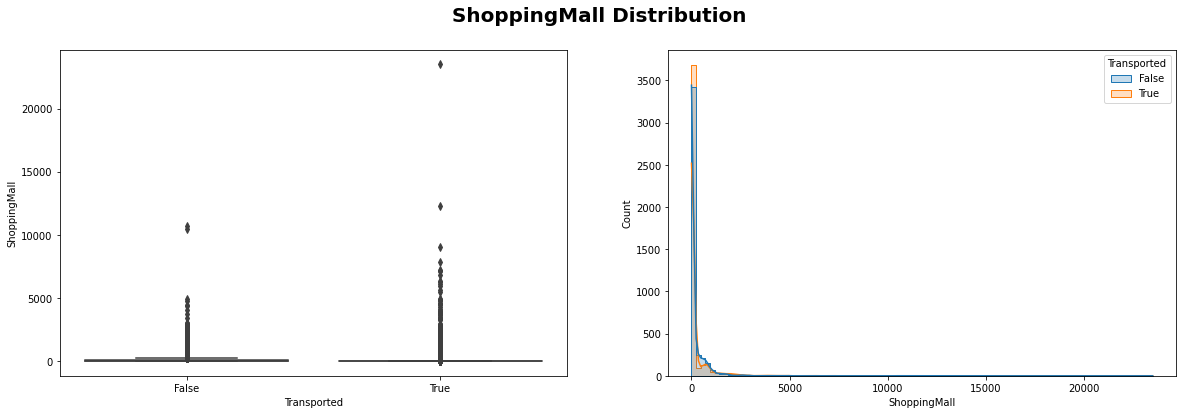

Percentage of Passengers with no Spa Billing - 61.24%
Transported Passengers Spa Billing Distribution - 
Minimum Spa Billing - 0.0
Maximum Spa Billing - 4103.0
Average Spa Billing - 61.675530674131096
Non Transported Passengers Spa Billing Distribution - 
Minimum Spa Billing - 0.0
Maximum Spa Billing - 22408.0
Average Spa Billing - 564.3826663509353


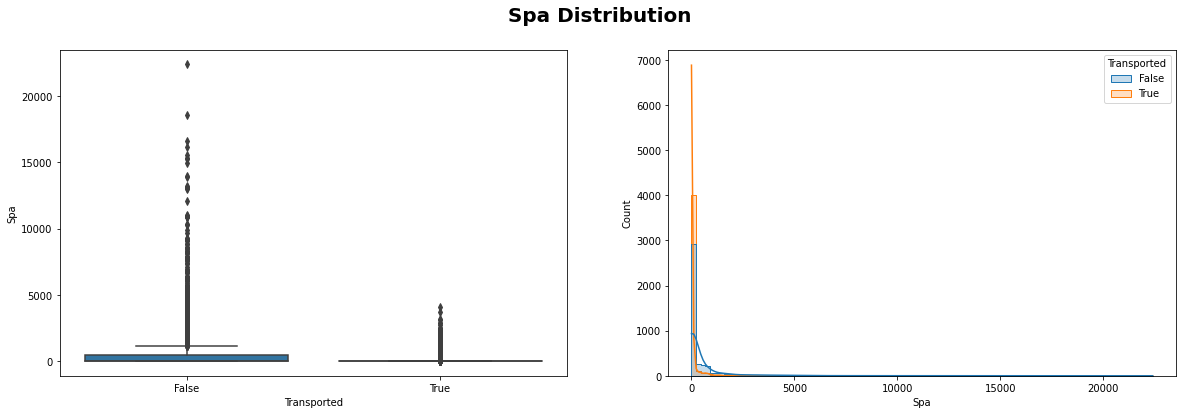

Percentage of Passengers with no VRDeck Billing - 63.21%
Transported Passengers VRDeck Billing Distribution - 
Minimum VRDeck Billing - 0.0
Maximum VRDeck Billing - 5063.0
Average VRDeck Billing - 69.1481308411215
Non Transported Passengers VRDeck Billing Distribution - 
Minimum VRDeck Billing - 0.0
Maximum VRDeck Billing - 24133.0
Average VRDeck Billing - 543.6298224852071


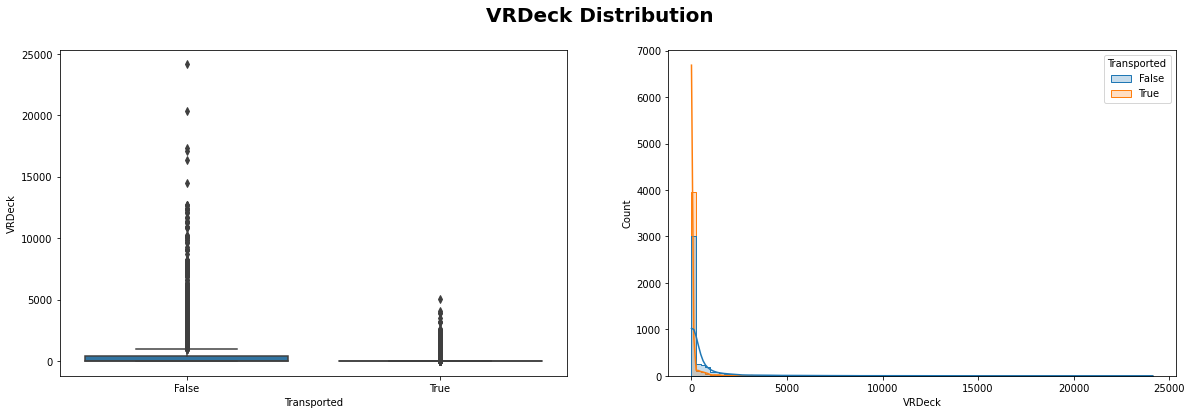

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('RoomService Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='RoomService', data=df_train, ax=ax[0])
sns.histplot(x='RoomService', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1])

print(colored(f"Percentage of Passengers with no RoomService Billing - {len(df_train[df_train['RoomService']==0.0])/len(df_train)*100:.2f}%", 'red'))
print(colored("Transported Passengers RoomService Billing Distribution - ", 'magenta'))
print(colored(f"Minimum RoomService Billing - {df_train[df_train['Transported']==True]['RoomService'].describe()['min']}", 'magenta'))
print(colored(f"Maximum RoomService Billing - {df_train[df_train['Transported']==True]['RoomService'].describe()['max']}", 'magenta'))
print(colored(f"Average RoomService Billing - {df_train[df_train['Transported']==True]['RoomService'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers RoomService Billing Distribution - ", 'blue'))
print(colored(f"Minimum RoomService Billing - {df_train[df_train['Transported']==False]['RoomService'].describe()['min']}", 'blue'))
print(colored(f"Maximum RoomService Billing - {df_train[df_train['Transported']==False]['RoomService'].describe()['max']}", 'blue'))
print(colored(f"Average RoomService Billing - {df_train[df_train['Transported']==False]['RoomService'].describe()['mean']}", 'blue'))



plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('FoodCourt Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='FoodCourt', data=df_train, ax=ax[0])
sns.histplot(x='FoodCourt', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1])

print(colored(f"Percentage of Passengers with no FoodCourt Billing - {len(df_train[df_train['FoodCourt']==0.0])/len(df_train)*100:.2f}%", 'red'))
print(colored("Transported Passengers FoodCourt Billing Distribution - ", 'magenta'))
print(colored(f"Minimum FoodCourt Billing - {df_train[df_train['Transported']==True]['FoodCourt'].describe()['min']}", 'magenta'))
print(colored(f"Maximum FoodCourt Billing - {df_train[df_train['Transported']==True]['FoodCourt'].describe()['max']}", 'magenta'))
print(colored(f"Average FoodCourt Billing - {df_train[df_train['Transported']==True]['FoodCourt'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers FoodCourt Billing Distribution - ", 'blue'))
print(colored(f"Minimum FoodCourt Billing - {df_train[df_train['Transported']==False]['FoodCourt'].describe()['min']}", 'blue'))
print(colored(f"Maximum FoodCourt Billing - {df_train[df_train['Transported']==False]['FoodCourt'].describe()['max']}", 'blue'))
print(colored(f"Average FoodCourt Billing - {df_train[df_train['Transported']==False]['FoodCourt'].describe()['mean']}", 'blue'))




plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('ShoppingMall Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='ShoppingMall', data=df_train, ax=ax[0])
sns.histplot(x='ShoppingMall', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1])

print(colored(f"Percentage of Passengers with no ShoppingMall Billing - {len(df_train[df_train['ShoppingMall']==0.0])/len(df_train)*100:.2f}%", 'red'))
print(colored("Transported Passengers ShoppingMall Billing Distribution - ", 'magenta'))
print(colored(f"Minimum ShoppingMall Billing - {df_train[df_train['Transported']==True]['ShoppingMall'].describe()['min']}", 'magenta'))
print(colored(f"Maximum ShoppingMall Billing - {df_train[df_train['Transported']==True]['ShoppingMall'].describe()['max']}", 'magenta'))
print(colored(f"Average ShoppingMall Billing - {df_train[df_train['Transported']==True]['ShoppingMall'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers ShoppingMall Billing Distribution - ", 'blue'))
print(colored(f"Minimum ShoppingMall Billing - {df_train[df_train['Transported']==False]['ShoppingMall'].describe()['min']}", 'blue'))
print(colored(f"Maximum ShoppingMall Billing - {df_train[df_train['Transported']==False]['ShoppingMall'].describe()['max']}", 'blue'))
print(colored(f"Average ShoppingMall Billing - {df_train[df_train['Transported']==False]['ShoppingMall'].describe()['mean']}", 'blue'))




plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Spa Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='Spa', data=df_train, ax=ax[0])
sns.histplot(x='Spa', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1])

print(colored(f"Percentage of Passengers with no Spa Billing - {len(df_train[df_train['Spa']==0.0])/len(df_train)*100:.2f}%", 'red'))
print(colored("Transported Passengers Spa Billing Distribution - ", 'magenta'))
print(colored(f"Minimum Spa Billing - {df_train[df_train['Transported']==True]['Spa'].describe()['min']}", 'magenta'))
print(colored(f"Maximum Spa Billing - {df_train[df_train['Transported']==True]['Spa'].describe()['max']}", 'magenta'))
print(colored(f"Average Spa Billing - {df_train[df_train['Transported']==True]['Spa'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers Spa Billing Distribution - ", 'blue'))
print(colored(f"Minimum Spa Billing - {df_train[df_train['Transported']==False]['Spa'].describe()['min']}", 'blue'))
print(colored(f"Maximum Spa Billing - {df_train[df_train['Transported']==False]['Spa'].describe()['max']}", 'blue'))
print(colored(f"Average Spa Billing - {df_train[df_train['Transported']==False]['Spa'].describe()['mean']}", 'blue'))


plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('VRDeck Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='VRDeck', data=df_train, ax=ax[0])
sns.histplot(x='VRDeck', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1])

print(colored(f"Percentage of Passengers with no VRDeck Billing - {len(df_train[df_train['VRDeck']==0.0])/len(df_train)*100:.2f}%", 'red'))
print(colored("Transported Passengers VRDeck Billing Distribution - ", 'magenta'))
print(colored(f"Minimum VRDeck Billing - {df_train[df_train['Transported']==True]['VRDeck'].describe()['min']}", 'magenta'))
print(colored(f"Maximum VRDeck Billing - {df_train[df_train['Transported']==True]['VRDeck'].describe()['max']}", 'magenta'))
print(colored(f"Average VRDeck Billing - {df_train[df_train['Transported']==True]['VRDeck'].describe()['mean']}", 'magenta'))

print(colored("Non Transported Passengers VRDeck Billing Distribution - ", 'blue'))
print(colored(f"Minimum VRDeck Billing - {df_train[df_train['Transported']==False]['VRDeck'].describe()['min']}", 'blue'))
print(colored(f"Maximum VRDeck Billing - {df_train[df_train['Transported']==False]['VRDeck'].describe()['max']}", 'blue'))
print(colored(f"Average VRDeck Billing - {df_train[df_train['Transported']==False]['VRDeck'].describe()['mean']}", 'blue'))



plt.show()

**INSIGHTS FROM THE GRAPH**
We can clearly observe that all the distributions are centered towards zero.
There are more than 60% passengers in each distribution who have not paid for that service.
Also, there are few cases with very high billings (looks like an outlier)
It looks like using these features directly for modelling won't help and we might need to create new features from these to have better performance.

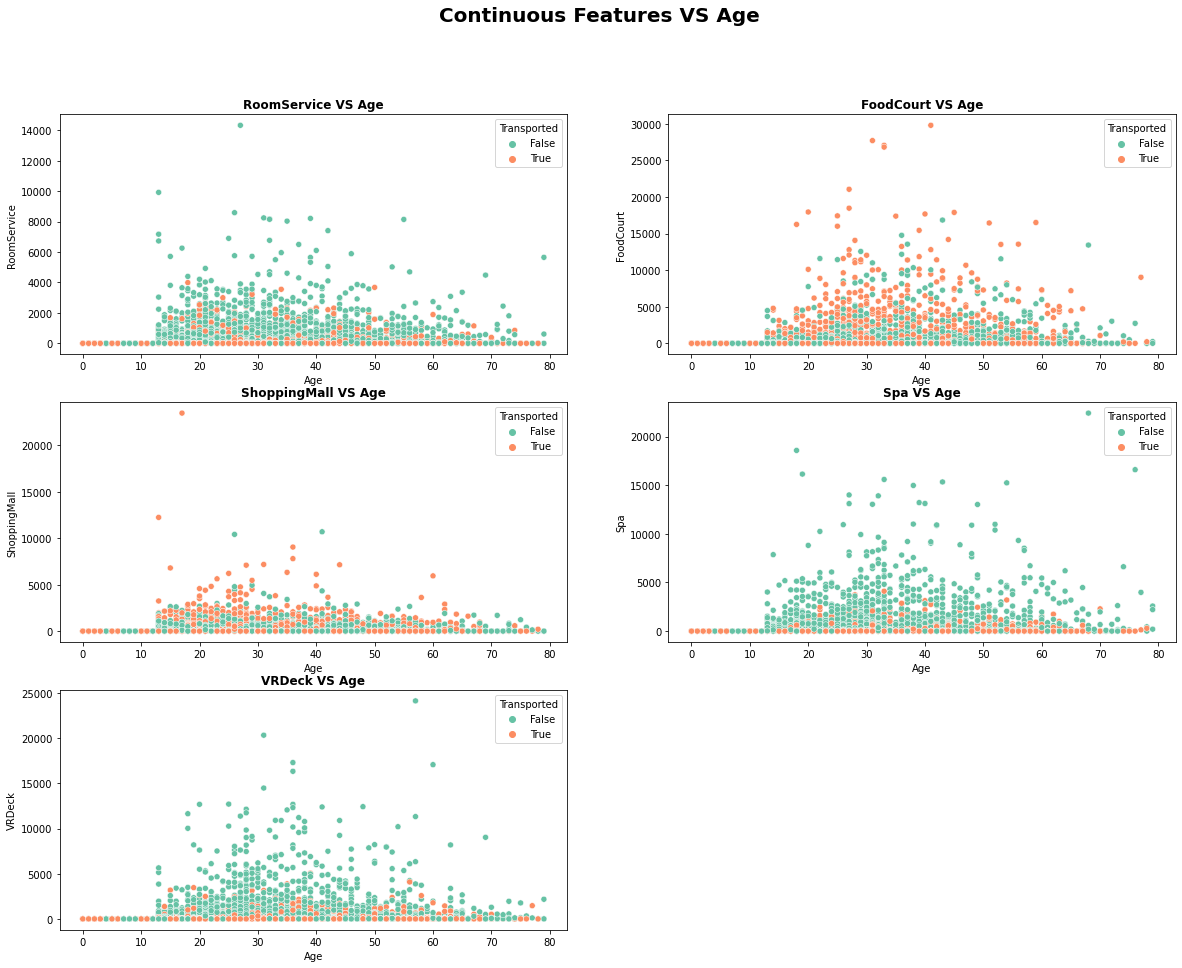

In [45]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Continuous Features VS Age', size = 20, weight='bold')
fig.delaxes(ax[2][1])

df_temp = df_train.iloc[:, 5:12]
columns = df_temp.columns[2:]
for i, col in enumerate(columns):
    sns.scatterplot(x='Age', y=col, hue='Transported', data=df_train, ax=fig.axes[i], palette='Set2')
    fig.axes[i].set_title(f'{col} VS Age', weight='bold')
plt.show()

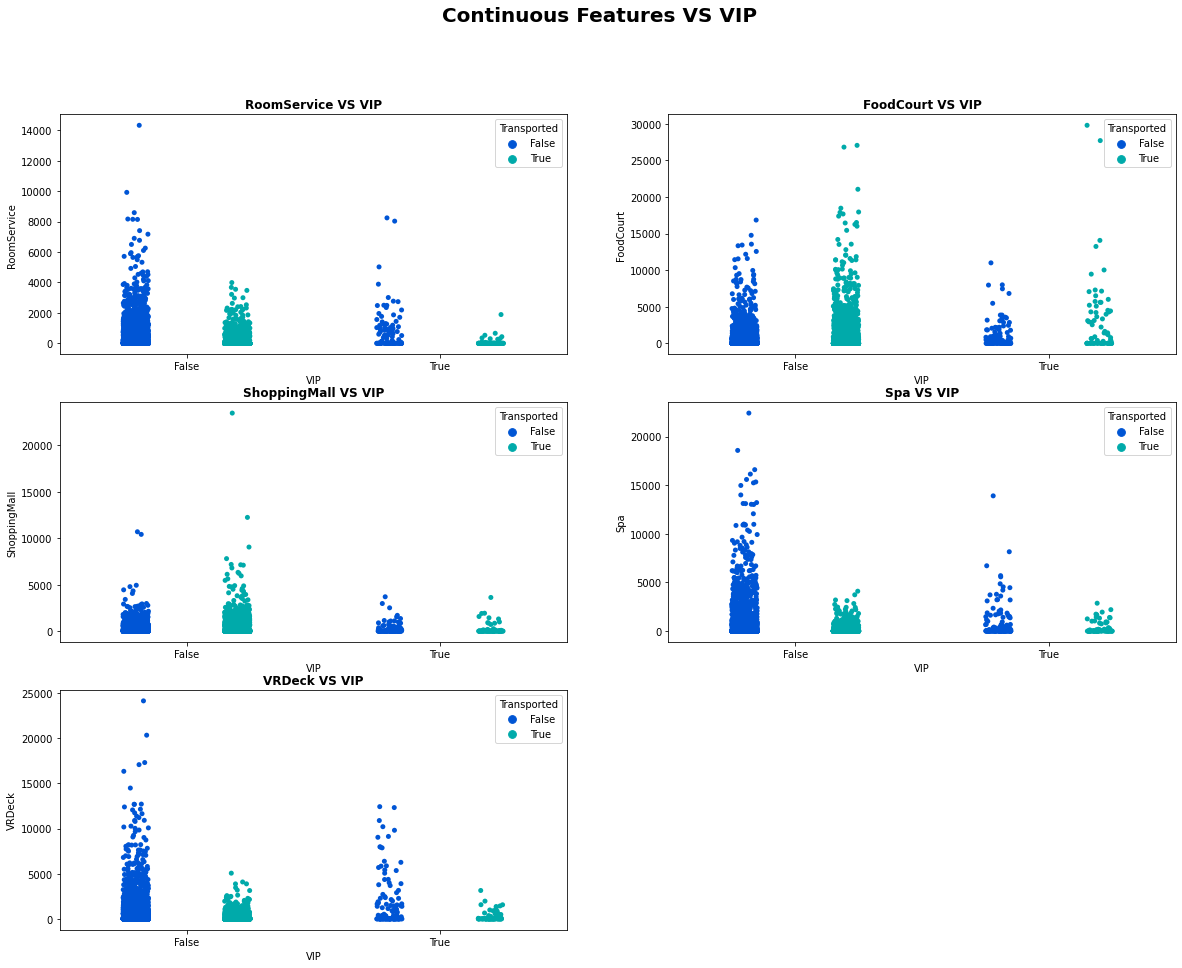

In [46]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Continuous Features VS VIP', size = 20, weight='bold')
fig.delaxes(ax[2][1])

for i, col in enumerate(columns):
    sns.stripplot(x="VIP", y=col, hue='Transported', data=df_train, dodge=True, ax=fig.axes[i], palette='winter')
    fig.axes[i].set_title(f'{col} VS VIP', weight='bold')
plt.show()

Total_Expenses Distribution - 
Minimum Total_Expenses - 0.0
Maximum Total_Expenses - 35987.0
Average Total_Expenses - 1440.8663292304152


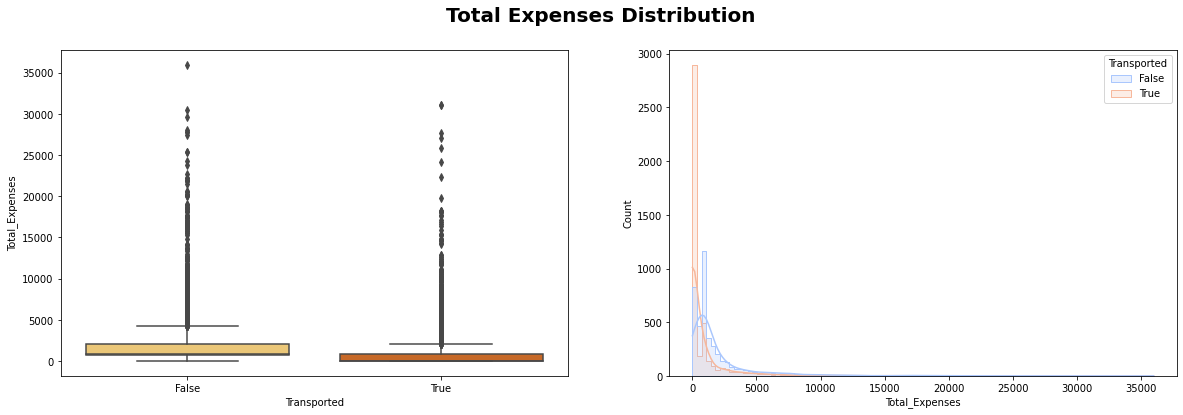

NoSpent Distribution - 
   NoSpent  Count
0    False   5040
1     True   3653


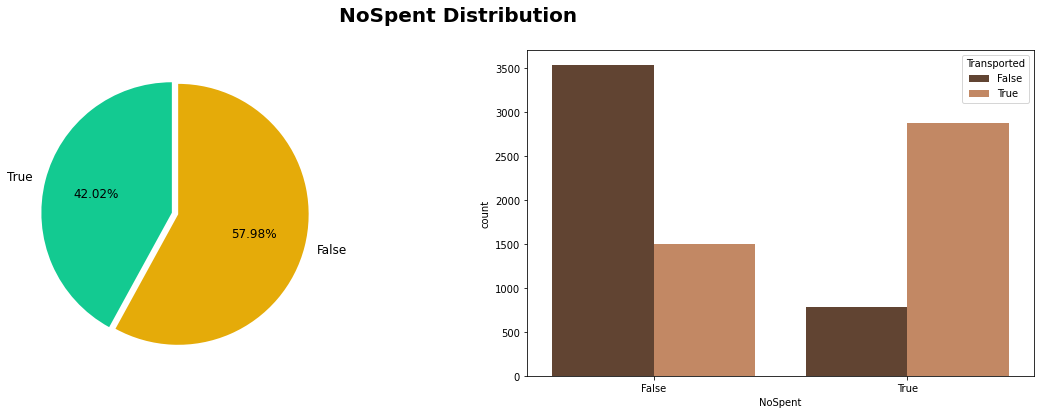

In [50]:
df_train['Total_Expenses'] = df_train[df_temp.columns[2:]].sum(axis=1)
df_train['NoSpent'] = df_train['Total_Expenses']==0

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Total Expenses Distribution', size = 20, weight='bold')

sns.boxplot(x='Transported', y='Total_Expenses', data=df_train, ax=ax[0], palette='YlOrBr')
sns.histplot(x='Total_Expenses', element="step", kde=True, data=df_train, hue='Transported', bins=100, ax=ax[1], palette='coolwarm')

print(colored("Total_Expenses Distribution - ", 'cyan'))
print(colored(f"Minimum Total_Expenses - {df_train['Total_Expenses'].describe()['min']}", 'cyan'))
print(colored(f"Maximum Total_Expenses - {df_train['Total_Expenses'].describe()['max']}", 'cyan'))
print(colored(f"Average Total_Expenses - {df_train['Total_Expenses'].describe()['mean']}", 'cyan'))

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('NoSpent Distribution', size = 20, weight='bold')

sizes = list(df_train['NoSpent'].value_counts(sort=False))

labels = df_train['NoSpent'].dropna().unique()
colors = ['#13CA91', '#e5ab09']
explode = (0.0,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='NoSpent', data=df_train, hue='Transported', ax=ax[1], palette='copper')

print(colored("NoSpent Distribution - ",'cyan'))
data = pd.DataFrame(df_train['NoSpent'].value_counts()).reset_index().rename(columns={'index': 'NoSpent', 'NoSpent':'Count'})
print(colored(data, 'cyan'))

plt.show()

In [51]:
print(colored(f"Number of missing values before - {df_train.isna().sum().sum()}", 'red'))

for col in df_train.columns:
    if col == 'Age':
        df_train[col].fillna(df_train[col].median(), inplace=True)
    else:
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)
        
print(colored(f"Number of missing values after - {df_train.isna().sum().sum()}", 'blue'))

Number of missing values before - 2125
Number of missing values after - 0


In [53]:
df_train.drop(['PassengerId', 'Cabin', 'Group', 'Name'], axis=1, inplace=True)

In [54]:
for col in df_train.columns[df_train.dtypes == object]:
    encoder = LabelEncoder()
    df_train[col] = encoder.fit_transform(df_train[col])
    
for col in df_train.columns[df_train.dtypes == bool]:
    df_train[col] = df_train[col].astype('int')

In [55]:
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.2, random_state=5)

print(colored(f"Number of rows in training set - {len(X_train)}", 'cyan'))
print(colored(f"Number of rows in validation set - {len(X_valid)}", 'magenta'))

Number of rows in training set - 6954
Number of rows in validation set - 1739


In [56]:
acc_plot = {} # For plotting purpose
preds = [] # For ensembling

In [57]:
model_lor = LogisticRegression(random_state=5).fit(X_train, y_train)
y_pred = model_lor.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
acc_plot['LogisticRegression'] = acc
print(f"Model Name: LogisticRegression ====>>> Validation Accuracy: {acc}")

Model Name: LogisticRegression ====>>> Validation Accuracy: 0.7975848188614146


In [58]:
model_svc = SVC(random_state=5).fit(X_train, y_train)
y_pred = model_svc.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
acc_plot['SVC'] = acc
print(f"Model Name: SVC ====>>> Validation Accuracy: {acc}")

Model Name: SVC ====>>> Validation Accuracy: 0.8056354226566993


In [59]:
model_nb = GaussianNB().fit(X_train, y_train)
y_pred = model_nb.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
acc_plot['NaiveBayes'] = acc
print(f"Model Name: NaiveBayes ====>>> Validation Accuracy: {acc}")

Model Name: NaiveBayes ====>>> Validation Accuracy: 0.7492811960897068


In [60]:
model_rfc = RandomForestClassifier(random_state=5).fit(X_train, y_train)
y_pred = model_rfc.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
acc_plot['RFClassifier'] = acc
print(f"Model Name: RFClassifier ====>>> Validation Accuracy: {acc}")

Model Name: RFClassifier ====>>> Validation Accuracy: 0.8010350776308223


In [61]:
model_gbc = GradientBoostingClassifier(random_state=5).fit(X_train, y_train)
y_pred = model_gbc.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
acc_plot['GBTClassifier'] = acc
print(f"Model Name: GBTClassifier ====>>> Validation Accuracy: {acc}")

Model Name: GBTClassifier ====>>> Validation Accuracy: 0.8102357676825762


In [62]:
model_xgb = XGBClassifier(eval_metric='logloss', random_state=5).fit(X_train, y_train)
y_pred = model_xgb.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
acc_plot['XGBoost'] = acc
print(f"Model Name: XGBoost Classifier ====>>> Validation Accuracy: {acc}")

Model Name: XGBoost Classifier ====>>> Validation Accuracy: 0.8039102932719954


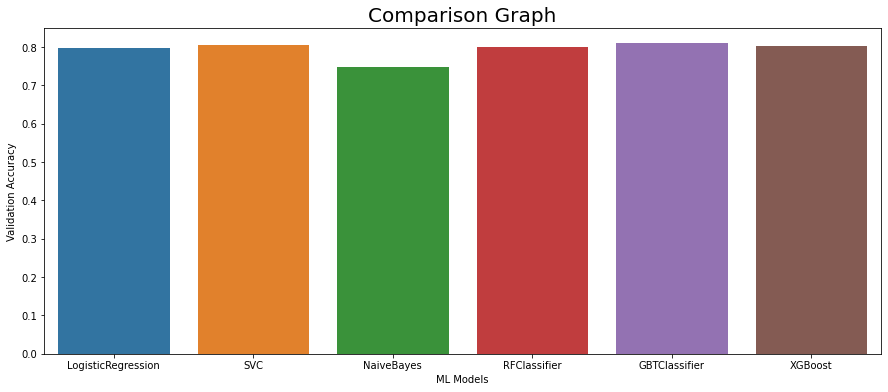

In [63]:
plt.figure(figsize=(15, 6))
sns.barplot(list(acc_plot.keys()), list(acc_plot.values()))
plt.xlabel("ML Models")
plt.ylabel("Validation Accuracy")
plt.title("Comparison Graph", fontsize=20)
plt.show()

In [64]:
y_pred = model_svc.predict(X_valid)
preds.append(y_pred)

y_pred = model_gbc.predict(X_valid)
preds.append(y_pred)

y_pred = model_xgb.predict(X_valid)
preds.append(y_pred)

In [65]:
final_preds = np.array(preds).mean(axis = 0)
final_preds = np.where(final_preds > 0.5, 1, 0)

In [66]:
acc = accuracy_score(y_valid, final_preds)
print(f"Ensembling ====>>> Validation Accuracy: {acc}")

Ensembling ====>>> Validation Accuracy: 0.8079355951696378
